In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [7]:
# NOTE: Data used for 'maximum' and 'b0' is taken from 1000 paths iteration (which later sliced)
# NOTE: While for the rest, we use data from 20 paths iteration

maximum = np.genfromtxt('../../dataset/1_iteration/maximumChannelCoefficient.csv')[49::50]
b0 = np.genfromtxt('../../dataset/1_iteration/channelCoefficient0.csv')[49::50]
b5 = np.genfromtxt('../../dataset/1000_iteration/maximum/ch_max_1000avg_5.csv')
b10 = np.genfromtxt('../../dataset/1000_iteration/maximum/ch_max_1000avg_10.csv')
b20 = np.genfromtxt('../../dataset/1000_iteration/maximum/ch_max_1000avg_20.csv')
b30 = np.genfromtxt('../../dataset/1000_iteration/maximum/ch_max_1000avg_30.csv')

In [10]:
pathStart = 50
pathNumber = 1000
pathSpacing = 50

In [11]:
df = pd.DataFrame()
df['Path'] = np.arange(pathStart, pathNumber + 1, step=pathSpacing)
df['Maximum'] = maximum
df['0'] = b0
df['5'] = b5
df['10'] = b10
df['20'] = b20
df['30'] = b30

In [44]:
df.head()

,Path,Maximum,0,5,10,20,30
0,50,2500.0,2500.0,2498.44039,2493.79099,2475.31362,2444.54379
1,100,10000.0,10000.0,9993.72574,9974.81517,9899.49305,9774.82099
2,150,22500.0,22500.0,22485.78689,22443.23677,22274.22708,21993.00237
3,200,40000.0,40000.0,39974.73582,39899.17170,39598.28361,39101.98489
4,250,62500.0,62500.0,62460.41823,62342.42638,61868.21909,61094.16529


<IPython.core.display.Javascript object>


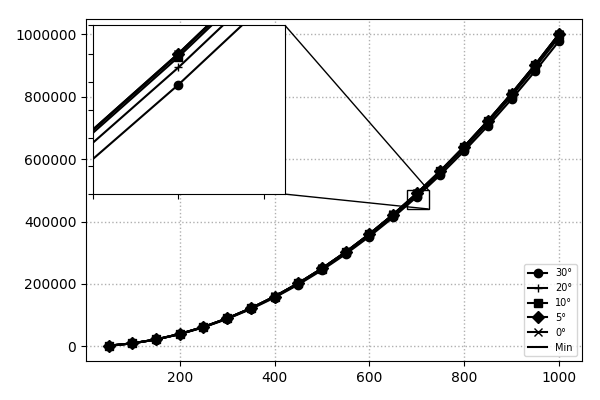

In [47]:
%matplotlib notebook
# plt.rc('font', size=12, family='Times New Roman', weight='light')

fig, channel = plt.subplots(figsize=(6, 4))

# channel.set_xlabel('Jumlah Jalur')
# channel.set_ylabel('Koefisien Kanal')
# channel.set_title('Koefisien Kanal Batas Atas')
channel.plot(df['Path'], df['30'], label='30°', marker='o', color='black')
channel.plot(df['Path'], df['20'], label='20°', marker='+', color='black')
channel.plot(df['Path'], df['10'], label='10°', marker='s', color='black')
channel.plot(df['Path'], df['5'], label='5°', marker='D', color='black')
channel.plot(df['Path'], df['0'], label='0°', marker='x', color='black')
channel.plot(df['Path'], df['Maximum'], label='Min', color='black')
channel.legend(loc=4, prop={'size': 7})
channel.grid(linewidth='1', linestyle=':')

ax = zoomed_inset_axes(channel, 9, loc=2)
ax.plot(df['Path'], df['30'], label='30°', marker='o', color='black')
ax.plot(df['Path'], df['20'], label='20°', marker='+', color='black')
ax.plot(df['Path'], df['10'], label='10°', marker='s', color='black')
ax.plot(df['Path'], df['5'], label='5°', marker='D', color='black')
ax.plot(df['Path'], df['0'], label='0°', marker='x', color='black')
ax.plot(df['Path'], df['Maximum'], label='Min', color='black')

x1, x2, y1, y2 = 680, 725, 440000, 500000
ax.set_xlim(x1, x2)
ax.set_ylim(y1, y2)

mark_inset(channel, ax, loc1=1, loc2=4)
plt.yticks(visible=False)
plt.xticks(visible=False)

plt.tight_layout()
plt.show()
plt.savefig('../../images/batasatas_20path.png')

In [21]:
# saving current pandas df

df_to_save = df.round(decimals=2)
df_to_save.to_csv('../../dataset/1000_iteration/maximum/ch_max_1000avg_all.csv',index=False)